In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mettiu97/Portfolio-Mattia-D-Aiuto/refs/heads/main/credit_card_customers.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Create a copy of the DataFrame to avoid modifying the original.
df_copy = df.copy()

From an initial analysis we can eliminate the CUST_ID column as it is not useful

In [5]:
# Remove the CUST_ID column.
df_copy.drop(columns=["CUST_ID"], inplace=True)

df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


I check for missing values in the dataframe

In [6]:
df_copy.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


Finding a few missing values, I decide to replace them with the mean value

In [7]:
# Replace missing values with the average of the column.
df_copy.loc[df_copy["CREDIT_LIMIT"].isna(), "CREDIT_LIMIT"] = df_copy["CREDIT_LIMIT"].mean()
df_copy.loc[df_copy["MINIMUM_PAYMENTS"].isna(), "MINIMUM_PAYMENTS"] = df_copy["MINIMUM_PAYMENTS"].mean()

df_copy.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


I check that there are no more missing values

In [8]:
df_copy.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [9]:
# I decide to normalize all the columns to bring them to a single scale using the MinMaxScaler transformer
scaler = MinMaxScaler()
df_copy[:] = scaler.fit_transform(df_copy)
df_copy.head()


<ipython-input-9-410f50dfc3d7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.03252033 0.         ... 0.         0.01626016 0.01626016]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy[:] = scaler.fit_transform(df_copy)
<ipython-input-9-410f50dfc3d7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00558659 0.         0.03351955 ... 0.01396648 0.         0.06424581]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy[:] = scaler.fit_transform(df_copy)
<ipython-input-9-410f50dfc3d7>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1. 1. 1. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy[:] = scaler.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


I decide to create a correlation heatmap to take a deeper look at the correlation of the variables

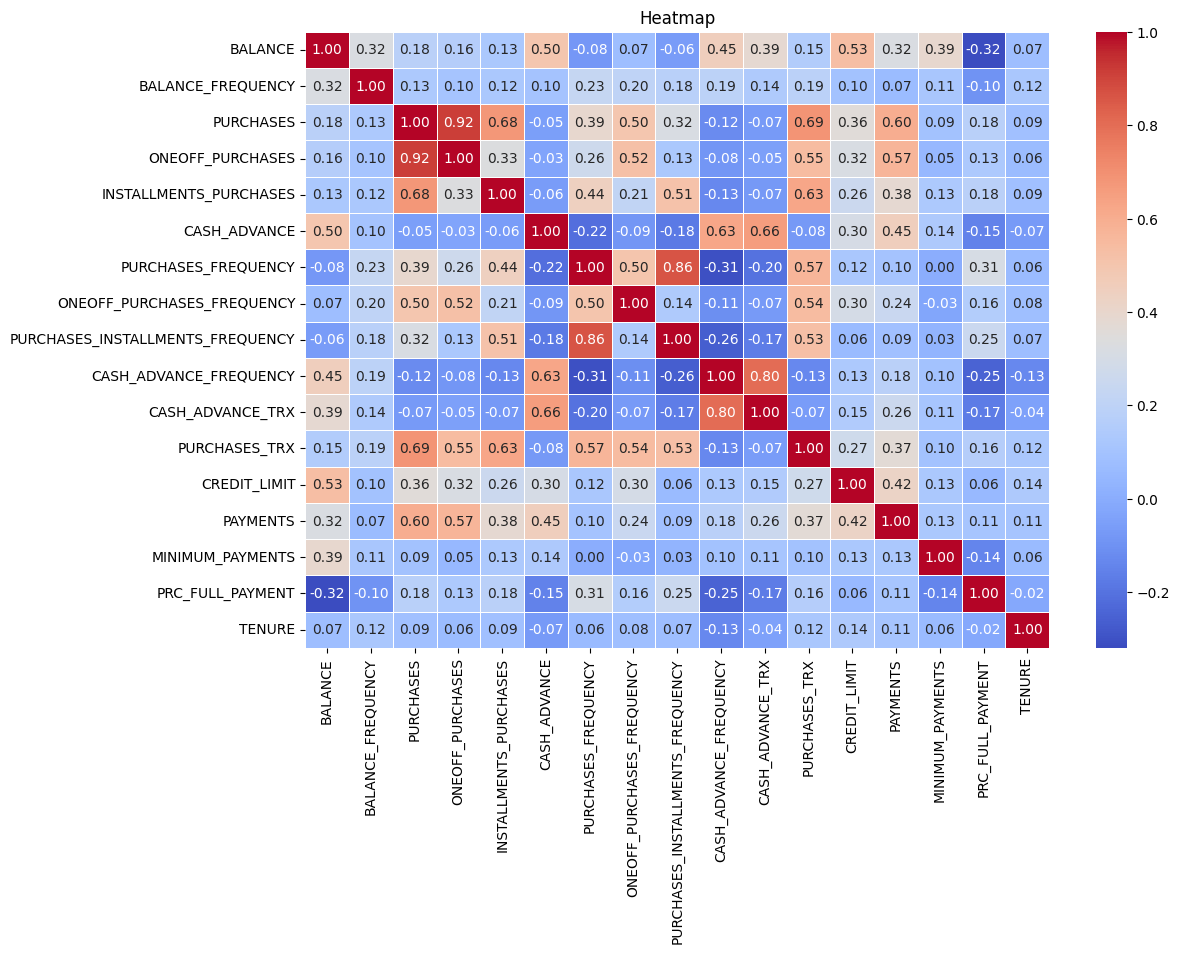

In [10]:
# Creation of the heatmap for correlation.
plt.figure(figsize=(12, 8))
corr_matrix = df_copy.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap")
plt.show()

I now proceed to clustering using the elbow method and then after deciding on the number of clusters I proceed to display the scatterplot to identify the various groups of customers

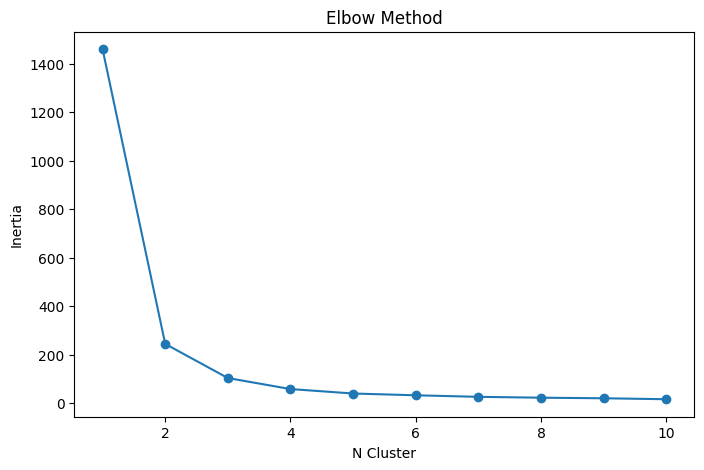

In [11]:
# Elbow Method to determine the optimal number of clusters.
features = df_copy[["PURCHASES_FREQUENCY", "CASH_ADVANCE"]]
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=2)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# After several trials I decide to utlize random state 2

# Plot graph Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("N Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

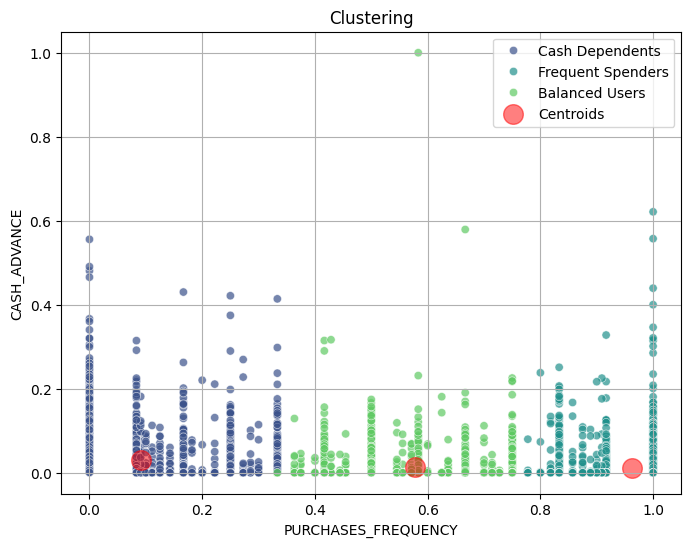

In [12]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=2)
df_copy["Cluster"] = kmeans.fit_predict(features)

# Defines custom names for clusters.
cluster_names = {
    0: "Cash Dependents",
    1: "Balanced Users",
    2: "Frequent Spenders"
}


# Scatterplot of clusters with centroids.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_copy["PURCHASES_FREQUENCY"], y=df_copy["CASH_ADVANCE"], hue=df_copy["Cluster"].map(cluster_names), palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="o", alpha=.5, label="Centroids")
plt.xlabel("PURCHASES_FREQUENCY")
plt.ylabel("CASH_ADVANCE")
plt.title("Clustering")
plt.legend()
plt.grid(True)
plt.show()


Based on the cluster analysis, we can assume that the three clusters belong to:

Frequent Spenders:
High frequency of purchases Low use of cash advance.

Proposed marketing strategies:
Offer cashback and rewards on purchases to incentivize them to spend more with the card. Promote loyalty programs to increase retention. Offer higher credit limits to encourage higher value transactions.

Cash Dependents:
Low frequency of purchases High use of cash advance.

Proposed marketing strategies:
Reduce fees on cash advances to retain them. Offer customized credit products such as short-term lines of credit. Educate customers on the benefits of card purchases versus withdrawals.

Balanced Users:
Frequency of purchases and cash advance balanced.

Proposed marketing strategies:
Offer packages with benefits on both uses: cashback on purchases + subsidized rates on advances. Analyze behavior over time and customize offers based on prevailing habits. Incentivize conversion to premium users with additional benefits.












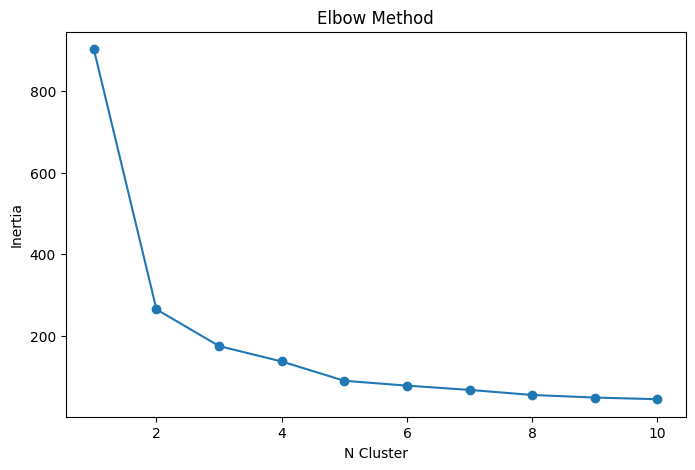

In [13]:
# Elbow Method to determine the optimal number of clusters.
features = df_copy[["BALANCE", "ONEOFF_PURCHASES_FREQUENCY"]]
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=2)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# After several trials I decide to utlize random state 2

# Plot graph Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("N Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

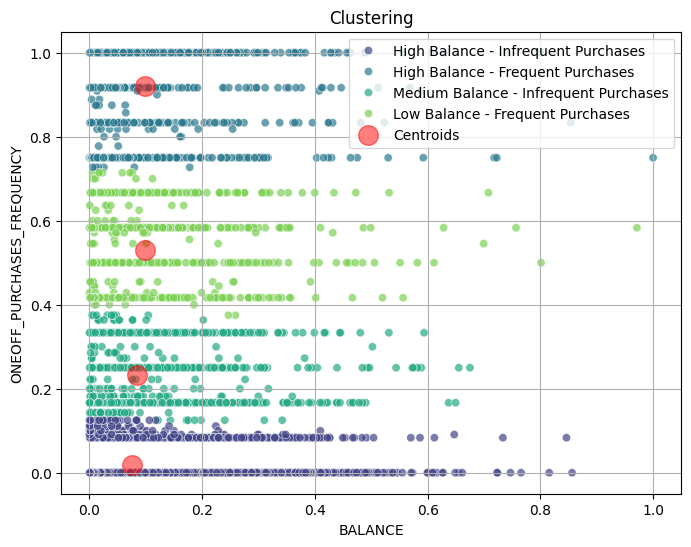

In [14]:
# Apply K-Means
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=2)
df_copy["Cluster"] = kmeans.fit_predict(features)

# Defines custom names for clusters.
cluster_names = {
    0: "Medium Balance - Infrequent Purchases",
    1: "High Balance - Frequent Purchases",
    2: "High Balance - Infrequent Purchases",
    3: "Low Balance - Frequent Purchases"
}

# Scatterplot of clusters with centroids.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_copy["BALANCE"], y=df_copy["ONEOFF_PURCHASES_FREQUENCY"], hue=df_copy["Cluster"].map(cluster_names), palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="red", marker="o", alpha=.5, label="Centroids")
plt.xlabel("BALANCE")
plt.ylabel("ONEOFF_PURCHASES_FREQUENCY")
plt.title("Clustering")
plt.legend()
plt.grid(True)
plt.show()

Based on the cluster analysis, we can assume that the four clusters belong to:

High Balance - Infrequent Purchases: Customers with high balances but who rarely use the card for individual purchases.

Proposed marketing strategies:
Cashback and loyalty points to increase card use.
Exclusive offers for loyalty.
Discounts on card payments.

Low Balance - Frequent Purchases: Customers with low balances but who make individual purchases frequently.

Proposed marketing strategies:
Increasing credit limit.
Offers to stimulate recurring purchases.
Discounts on high transactions.

Medium Balance - Infrequent Purchases: Medium balance customers who use the card sporadically and conservatively.

Proposed marketing strategies:
Incentives for more frequent use.
Discounts on repeat purchases.
Promotions on installment payments.

High Balance - Frequent Purchases: Customers with high balances and frequent use of the card for single purchases.

Proposed marketing strategies:
VIP programs and exclusive offers.
Collaborations with luxury brands.
Extra benefits such as insurance and concierge.


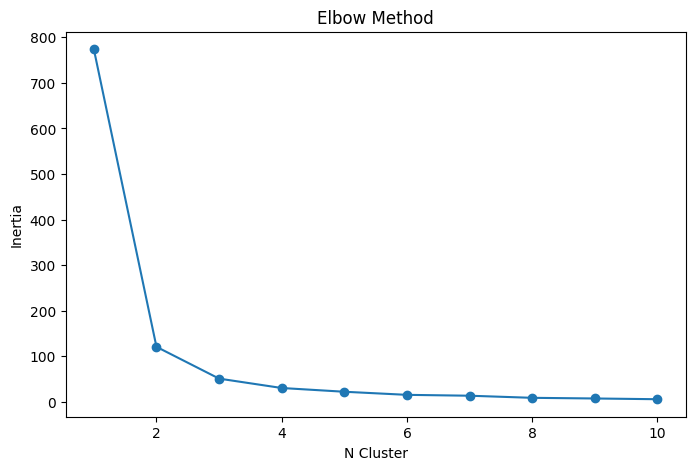

In [15]:
# Elbow Method to determine the optimal number of clusters.
features = df_copy[["MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT"]]
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=2)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# After several trials I decide to utlize random state 2

# Plot graph Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel("N Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

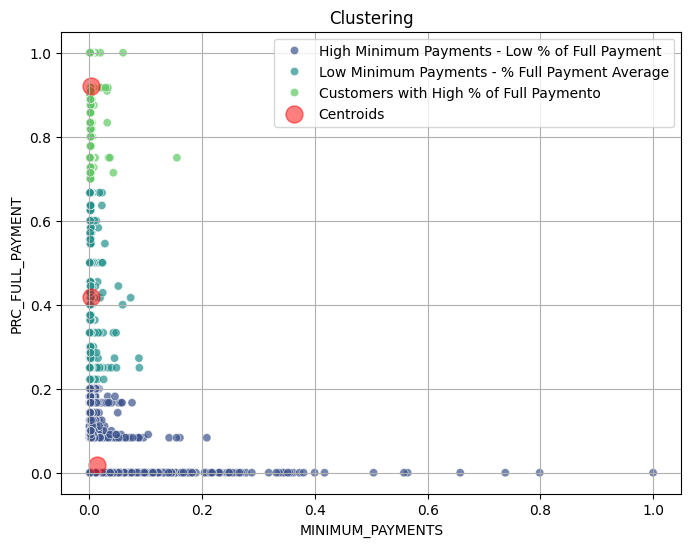

In [16]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=2)
df_copy["Cluster"] = kmeans.fit_predict(features)

# Defines custom names for clusters.
cluster_names = {
    0: "High Minimum Payments - Low % of Full Payment",
    1: "Customers with High % of Full Payment",
    2: "Low Minimum Payments - % Full Payment Average"
}

# Scatterplot of clusters with centroids.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_copy["MINIMUM_PAYMENTS"], y=df_copy["PRC_FULL_PAYMENT"], hue=df_copy["Cluster"].map(cluster_names), palette="viridis", alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c="red", marker="o", alpha=.5, label="Centroids")
plt.xlabel("MINIMUM_PAYMENTS")
plt.ylabel("PRC_FULL_PAYMENT")
plt.title("Clustering")
plt.legend()
plt.grid(True)
plt.show()

Based on the cluster analysis, we can assume that the three clusters belong to:


Customers with High Minimum Payments-Low Percentage of Full Payment:
They tend to pay high minimum amounts but rarely pay off the entire debt.
May have financial difficulties or manage credit carefully.
High risk of interest accumulation on outstanding balance.

Proposed Marketing Strategies:
Offer installment plans at subsidized rates to help them better manage their debt.
Educate these customers with information campaigns on benefits of full payment.
Incentivize paying the full balance with cashback or interest reductions.


Customers with Low Minimum Payments - Average Full Payment Percentage:
They pay low minimum amounts and sometimes pay off the entire debt.
They may be customers with balanced finances.

Proposed Marketing Strategies:
Propose discounts on future purchases for those who make regular full payments.
Offer premium credit cards with exclusive benefits to incentivize more spending.
Create loyalty plans to keep these customers active.


Customers with High Percentage of Full Payment:
They often pay off the entire balance without accumulating debt.
They probably have a stable financial situation and use the card for convenience.
They generate less profit from interest fees.

Proposed Marketing Strategies:
Offer cashback and rewards programs to increase the frequency of card use.
Create exclusive offers on premium financial products such as cards with additional benefits.
Incentivize card use for recurring payments or large purchases with special bonuses.